In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *

[nltk_data] Downloading package punkt_tab to /Users/alice/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package brown to /Users/alice/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [9]:
english_corpus = get_corpus_word_probs(language="English")
french_corpus = get_corpus_word_probs(language="French")
spanish_corpus = get_corpus_word_probs(language="Spanish")

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from nltk.corpus import stopwords

sns.set_theme()

en_stop_words = set(stopwords.words("english"))
fr_stop_words = set(stopwords.words("french"))
es_stop_words = set(stopwords.words("spanish"))

word_map = {}

# same tokenization
brown_words = brown.words()
brown_words = [word.lower() for word in brown_words]
brown_words = [word for word in brown_words if word.isalnum()]
brown_words = [word for word in words if not word.isdigit()]
word_map["Brown Corpus"] = brown_words

for book in ["Alice in Wonderland", "Frankenstein", "Sherlock Holmes"]:
    filepath = f"samples/{book.replace(' ', '_').lower()}.txt"
    with open(filepath) as f:
        text = f.read()
    words = tokenize_text(text)
    word_map[book] = words

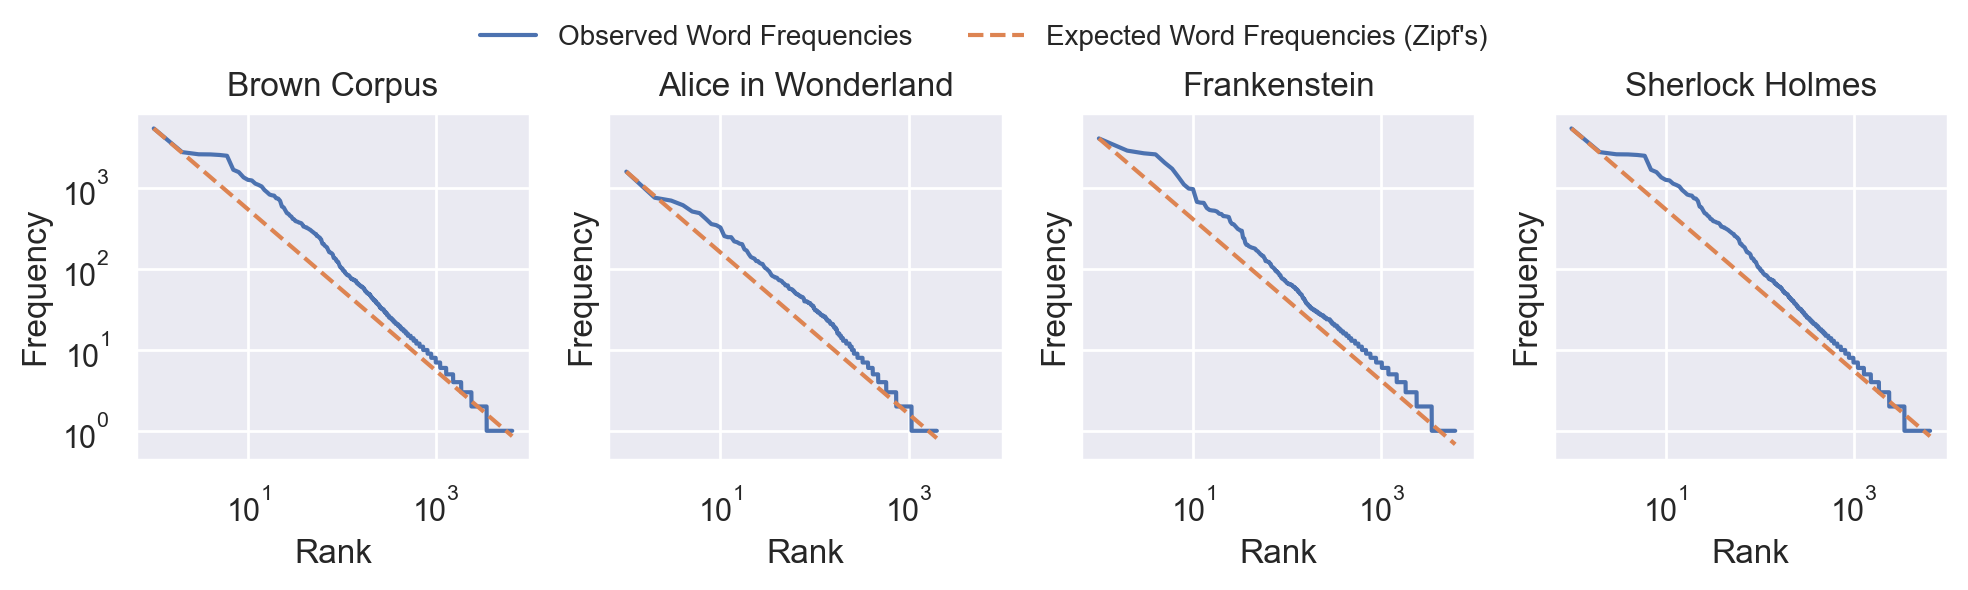

In [ ]:
# Visualize Expected
fig, axs = plt.subplots(figsize=(10, 3), dpi=200, ncols=4, sharey=True, sharex=True)

top_deviating = {}

for i, item in enumerate(word_map.items()):
    ax = axs[i]
    label, words = item

    word_counts = Counter(words)

    sorted_counts = word_counts.most_common()
    ranks = range(1, len(sorted_counts) + 1)
    frequencies = np.array([count for _, count in sorted_counts])

    # Step 2: Calculate expected frequencies based on Zipf's law
    max_frequency = frequencies[0]
    expected_frequencies = max_frequency / ranks

    # Step 3: Compute deviations
    deviations = np.abs(frequencies - expected_frequencies)

    # Step 4: Identify top deviating words
    deviation_data = [
        (word, freq, dev) for (word, freq), dev in zip(sorted_counts, deviations)
    ]
    deviation_data = sorted(deviation_data, key=lambda x: x[2], reverse=True)

    # Print top deviating words
    top_deviating[label] = []
    i = 0
    while len(top_deviating[label]) < 10:
        word, freq, dev = deviation_data[i]
        if word not in en_stop_words:
            top_deviating[label].append(f"Word: {word}, Frequency: {freq}, Deviation: {dev}")
        i += 1

    # Step 5: Visualization
    ax.set_title(label)
    ax.loglog(ranks, frequencies, label=f"Observed Word Frequencies")
    ax.loglog(
        ranks, expected_frequencies, label="Expected Word Frequencies (Zipf's)", linestyle="--"
    )
    ax.set_xlabel("Rank")
    ax.set_ylabel("Frequency")
    # ax.legend()

# Create a single legend for the entire figure
handles, labels = axs[
    0
].get_legend_handles_labels()  # Get handles and labels from one subplot
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize="small", frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("assets/zipfs_law.png")

with open("assets/zipfs_law_deviating.txt", "w") as f:
    for label, dvs in top_deviating.items():
        f.write(f"{label}\n")
        f.write("\n".join(dvs))
        f.write("\n\n")

plt.show()

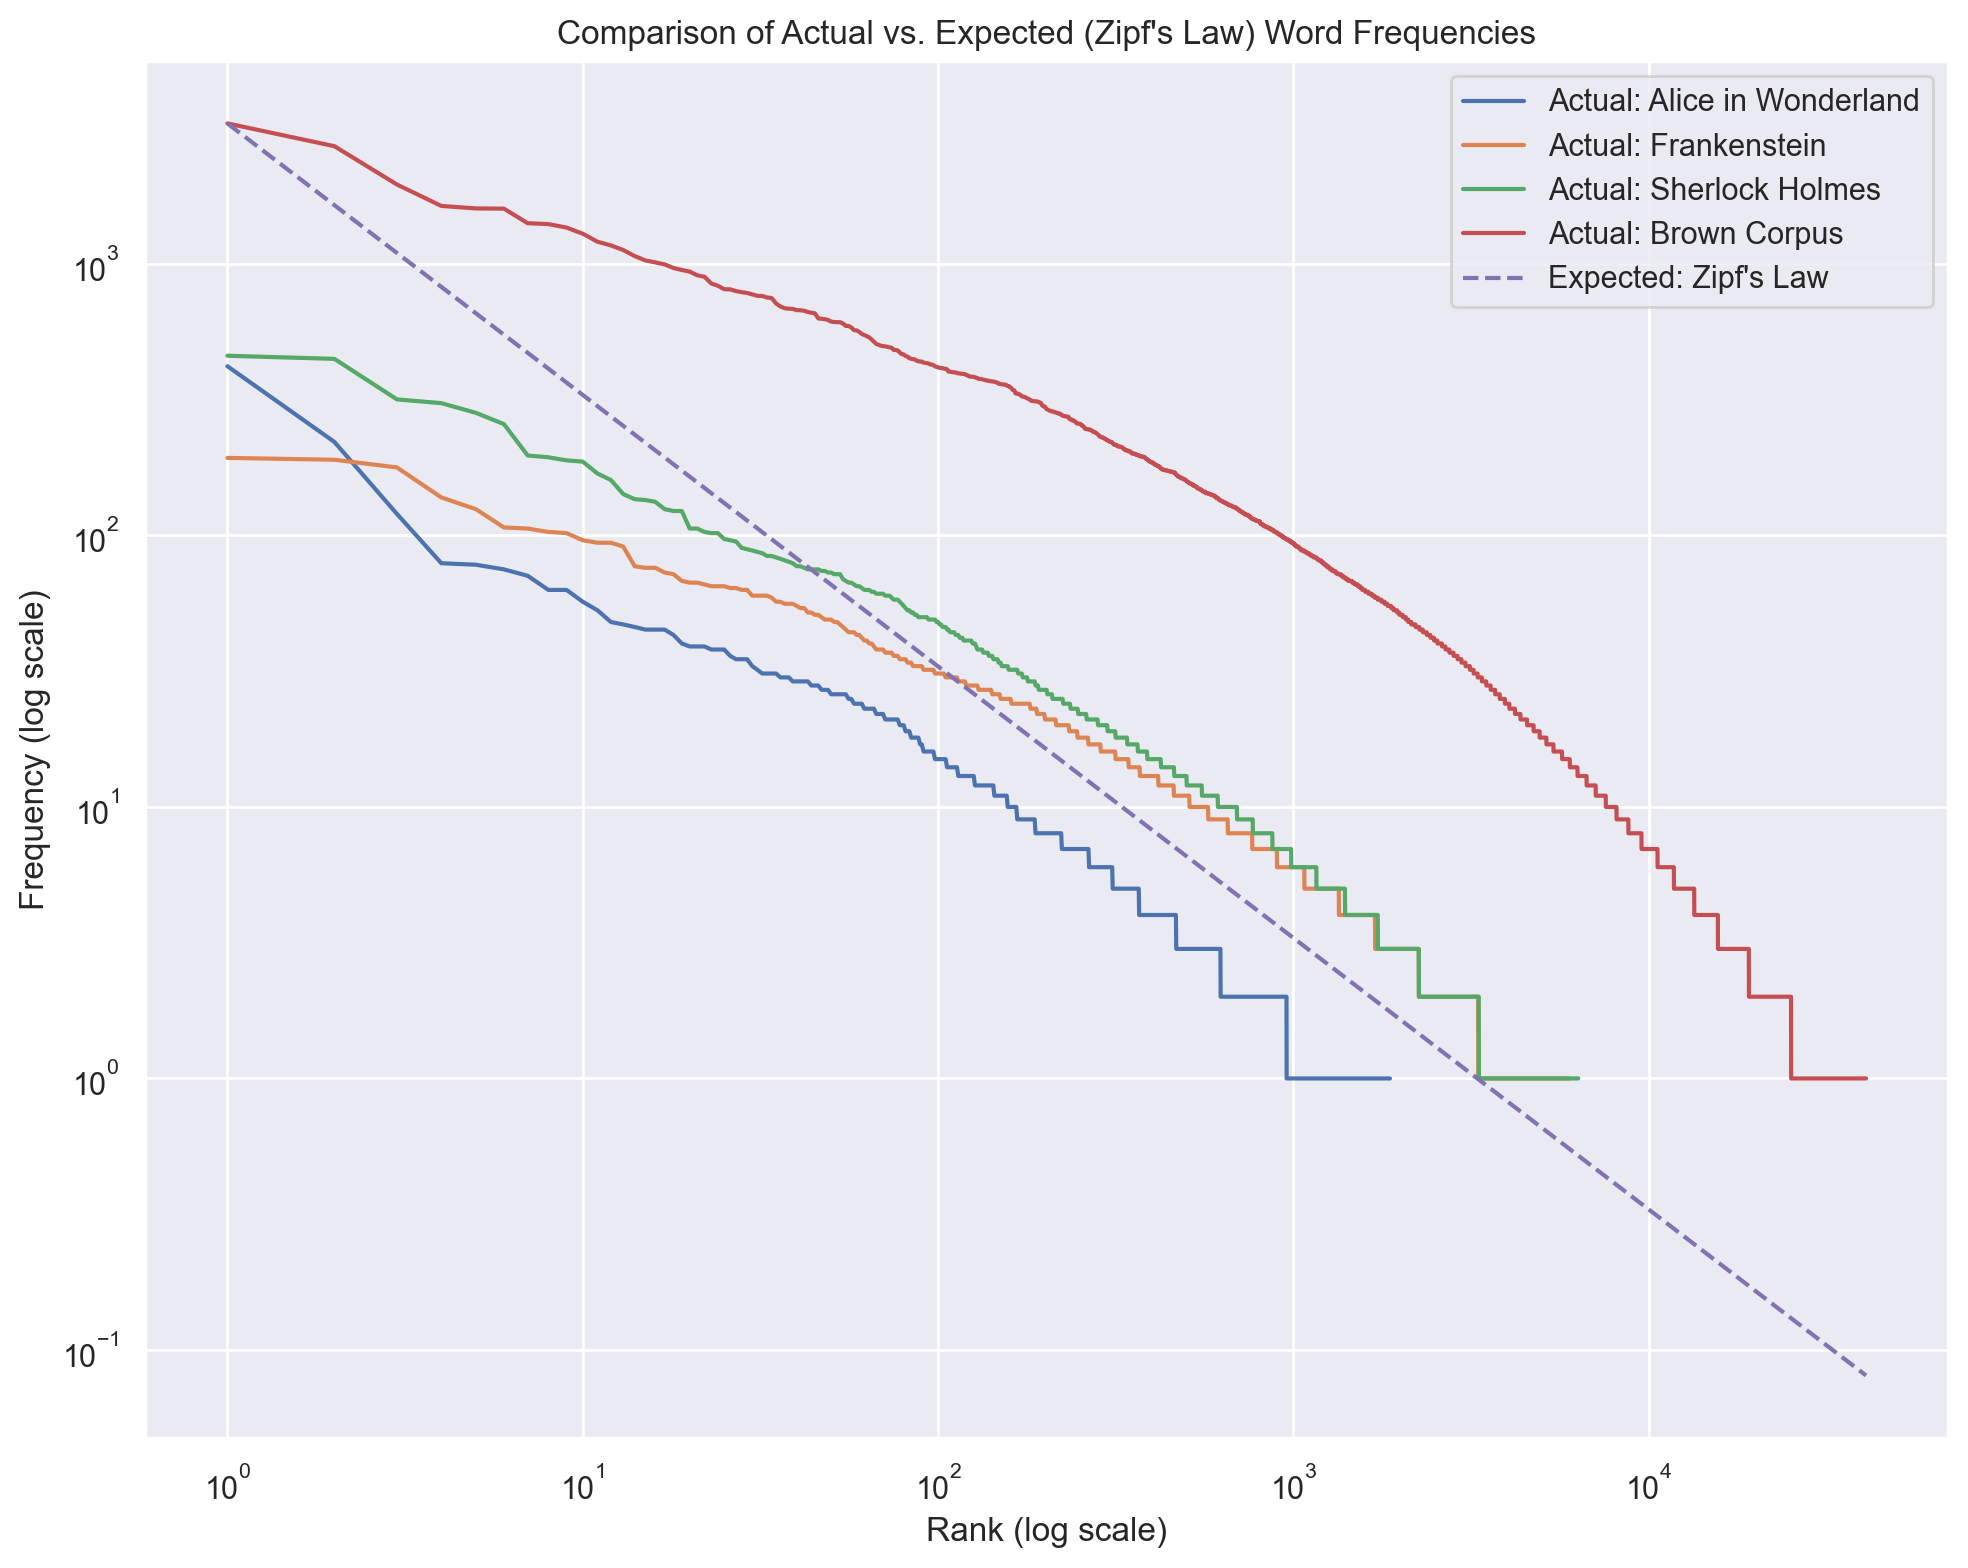

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from nltk.corpus import brown, stopwords

sns.set_theme()

# Define stop words for filtering
stop_words = set(stopwords.words("english"))  # Extend for other languages as needed


# Define a tokenization function
def tokenize_text(text):
    tokens = text.lower().split()
    return [token.strip(".,!?()[]") for token in tokens if token.isalnum()]


# Initialize word_map to hold book data
word_map = {}

# Process books
for book in ["Alice in Wonderland", "Frankenstein", "Sherlock Holmes"]:
    filepath = f"samples/{book.replace(' ', '_').lower()}.txt"
    with open(filepath) as f:
        text = f.read()
    words = tokenize_text(text)
    word_map[book] = [word for word in words if word not in stop_words]

# Process Brown Corpus
brown_words = [word.lower() for word in brown.words() if word.isalnum()]
word_map["Brown Corpus"] = [word for word in brown_words if word not in stop_words]

# Visualize Expected vs. Actual Distributions
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)
for label, words in word_map.items():
    # Count word frequencies
    word_counts = Counter(words)

    # Sort counts and extract ranks and frequencies
    sorted_counts = word_counts.most_common()
    ranks = range(1, len(sorted_counts) + 1)
    frequencies = np.array([count for _, count in sorted_counts])

    # Calculate expected frequencies based on Zipf's law
    max_frequency = frequencies[0]
    expected_frequencies = max_frequency / ranks

    # Visualization
    plt.loglog(ranks, frequencies, label=f"Actual: {label}")
    if label == "Brown Corpus":  # Show expected frequencies only once for clarity
        plt.loglog(
            ranks, expected_frequencies, label="Expected: Zipf's Law", linestyle="--"
        )

# Customize plot appearance
plt.title("Comparison of Actual vs. Expected (Zipf's Law) Word Frequencies")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.tight_layout()
plt.show()